## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

**The dataframe has 294478 rows**

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

**290584 unique users recorded on the site**

d. The proportion of users converted.

In [5]:
df[df.converted == 1].shape[0] / df.shape[0]

0.11965919355605512

In [6]:
df.converted.mean() # Since the column consists of 0s and 1s
                    # mean would be accurate for getting proportion

0.11965919355605512

**About 12% of users are converted**

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.query("group == 'control' and landing_page == 'new_page'").shape[0] + df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]

3893

**3893 times that they mismatched**

f. Do any of the rows have missing values?

In [8]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**No missing values**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# First we'll get the indexes of the data we'd want to drop

index1 = df.query("landing_page == 'old_page' and group == 'treatment'").index
index2 = df.query("landing_page == 'new_page' and group == 'control'").index

# We'd merge them into one index

total_indexes = index1.append(index2)

# Then all is left is to drop them and save the new dataframe in df2

df2 = df.drop(total_indexes)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [12]:
# that means all is done as intended

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2.user_id.nunique()

290584

**Same as before, which'd mean dropped data wasn't relevant to our study**

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
# For this I'm gonna use .value_counts() as I know it sorts counts of values descendentally,
# And since they're all 1's, the value with count of 2 should be at the top.

df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

**user_id 773192 is duplicated**

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


He's from treatment group, was on the new page twice, nevertheless **Hasn't Converted**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop([2893], inplace=True)

In [17]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.converted.mean()

0.11959708724499628

>**12% Chance they'll convert, Regardless of what page they receive**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2[df2.group == "control"].converted.mean()

0.1203863045004612

>**12% Chance they'd convert, given that they're in Control group**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
df2[df2.group == "treatment"].converted.mean()

0.11880806551510564

>**11.88% Chance they'd convert, given that they're in Treatment group**

d. What is the probability that an individual received the new page?

In [21]:
df2[df2.landing_page == "new_page"].shape[0] / df2.shape[0]

0.5000619442226688

>**50% Chance of any given individual getting the new page**

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Almost both pages has same converted rate, and in fact old page has slightly higher conversion rate, which would mean, according to the numbers above, it isn't worth to pick the new page over the old**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_{0}: p_{new} - p_{old} \leq 0 $$
$$ H_{1}: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

> From point `2.` $P_{new} = P_{old} = P_{conversion}$ 

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [22]:
p_new = df2.converted.mean()

p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [23]:
p_old = p_new

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2[df2.group == "treatment"].shape[0]

n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2[df2.group == "control"].shape[0]

n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
# For this simulation it'd be better if we use binomial distribution function from numpy, since it's all 1's and 0's
# **it's two sided like coins From Binomial Lesson **

new_page_converted_sample = np.random.binomial(n_new, p_new, 10000) / n_new

new_page_converted_sample.mean()

0.11958415456610005

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page_converted_sample = np.random.binomial(n_old, p_old, 10000) / n_old

old_page_converted_sample.mean()

0.11958514118149154

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
# This value here keeps changing everytime even though the seed is the same, so I really don't know why
# But mostly I end up getting results in favor of null hypothesis in the end

obs_diff = (new_page_converted_sample - old_page_converted_sample).mean()

obs_diff

-9.8661539146438903e-07

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
# p_diffs = []

# for _ in range(10000):
#     old_page_converted = np.random.binomial(1, p_old, n_old)
#     new_page_converted = np.random.binomial(1, p_new, n_new)
#     b_conversion_diff = new_page_converted.mean() - old_page_converted.mean()
    
#     p_diffs.append(b_conversion_diff)

In [30]:
# We're going for a new, better way of simulating p_diffs using a numpy function that's better suiting for this purpose
# and also more efficient, time and computing source-wise, as been kindly noted by in my last project review.

p_diffs = []

new_page_converted = np.random.binomial(n_new, p_new, 10000) / n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000) / n_old

p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

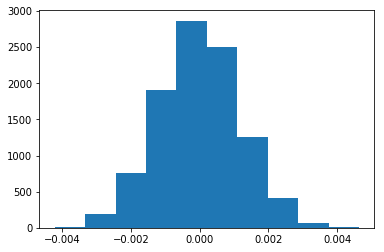

In [31]:
plt.hist(p_diffs); 

In [32]:
p_diffs = np.array(p_diffs) # Somewhy, when I converted p_diffs into NumPy array before plotting it,
                            # the plotting cell took so long to run, and never managed to complete! 

Normally distributed histogram, just as expected from doing a statistic with large enough samples, and is also in accordance with the **Central Limit Theorem.**

Our Hypothesis Again: $$ H_{0}: p_{new} - p_{old} \leq 0 $$
$$ H_{1}: p_{new} - p_{old} > 0 $$

In [33]:
# now to get the p-value mentioned in the next question, we'd need our sampling distribution of the null values,
# Then seeing whether we should stick with our null hypothesis, or reject it according to our little A/B test done.
# We want to sample from the closest point to the alternative hypothesis, which is 0 (aka. no difference between the two models)

null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

In [34]:
# To get the p-value we'd be comparing our simulated p_diffs array values to our actual "average conversion difference"
# where we'll get the proportion of the values that are "higher" in this case than actual conversion difference,

act_diff = df2[df2['group'] == 'treatment']['converted'].mean() - df2[df2['group'] == 'control']['converted'].mean() # Review note.

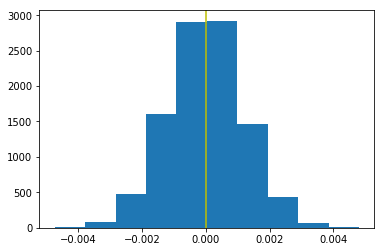

In [35]:
# plot null distribution

plt.hist(null_vals);

# Seeing where our observed difference fall on null distribution

plt.axvline(obs_diff, color="y");

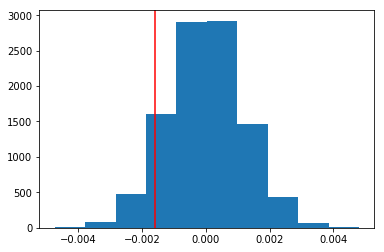

In [36]:
# plot null distribution

plt.hist(null_vals);

# Seeing where our observed difference fall on null distribution

plt.axvline(act_diff, color="r"); # Here I've changed axvline to act_diff, because it makes sense to use this value,
                                  # since we're also getting p-value using it.

now to get **P-Value** we'd want to get extreme values to the right, since our alt.Hypothesis states that diff between new page and old page, in terms of conversion, is greater than 0.

**Meaning the extreme values that are Greater than our observed statistic, which are in favor of the alternative hypothesis.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
(p_diffs > act_diff).mean()

0.90510000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

With such a high **P-Value** it's most likely that our statistic came from our null distribution.

It means the likelihood of obtaining our observed statistic or one more "extreme" value -that comes from the altrenative hypothesis-, given that our null hypothesis is true.

which in simpler terms -I hope- is, **the probability of getting one or more extreme difference between new_page and old_page that's under the alternative hypothesis**, if there's no difference or even old_page is still better, that is our null hypothesis is true.
Then getting that/those extreme value(s) would be something close to coincidence or luck. 
But if this P-Value were to be low -lower than our alpha level, threshold for type 1 errors- we would be calling the probability of getting those values not by sheer luck, meaning it wasn't a coincidence that we got difference in favor of the new_page, but rather due to fallibility of our null hypothesis, then we'd reject it, and Alternative hypothesis would be true.

**But in this case, since our P-Value is too much higher than our threshold for type1 errors, then we'd fail to reject the Null-Hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

convert_old = df2.query("converted == 1 and group == 'control'").shape[0]
convert_new = df2.query("converted == 1 and group == 'treatment'").shape[0]
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [39]:
# we'll set our parameters as follows: count -- array of successes of the two group which in this case is conversions
# nobs : number of observations, which refers to the number of users in the two groups
# Value : is set to 0 since we need to test p_value under the hypothesis that difference is 0
# alternative : is set to smaller in this case because we want to test that old_page mean is smaller than new_page mean
# prop_var : False since we need to calculate our values based on our proportions, not mere 0's and 1's

z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], 
                                              nobs=[n_old, n_new],
                                              value=0,
                                              alternative='smaller',
                                              prop_var=False)
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-score is a value that describes the relationship between a data point and the mean, and is measured in terms of the standard deviation for a specific data point from the mean and with a z-score of 1.3 it's most likely isn't big enough for us to prefer new page over the old one**

**And for the p-value of 90% it's consistent with what we got earlier in our statistic, though not the same, that our data most likely has come from the null, and it's enough of an evidence that we shouldn't reject the null, and thus stick with the old page.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [40]:
df2["ab_page"] = pd.get_dummies(df2['group'])['treatment']

In [41]:
df2.head() # For Accuracy checking

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


In [42]:
# Dropping landing_page col. to de-clutter our df

df2 = df2.drop('landing_page', axis=1)

In [43]:
df2.head()

,user_id,timestamp,group,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,0,0
1,804228,2017-01-12 08:01:45.159739,control,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,0,1
4,864975,2017-01-21 01:52:26.210827,control,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [44]:
df2['intercept'] = 1

log_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [45]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-23 20:39 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Our **Old Hypothesis** from part2 Again: $$ H_{0}: p_{new} - p_{old} \leq 0 $$
$$ H_{1}: p_{new} - p_{old} > 0 $$

Our **New Hypothesis** for Regression stats, and as they come by default: 
$$H_{0}: \beta_{0} = 0$$
$$H_{1}: \beta_{0} \neq0$$

As we want to see if our new page has any implication on conversion, even if it's negative, hence other than 0.

So, this hypothesis tests againt the efficency of using one variable to predicet the other.

>Here, regarding `ab_page`, we got a P-Value of 0.1899 or %19 is much higher than our alpha level of 0.05, and states that **the relationship between new_page and conversion rate isn't Stastically Significant Enough for us to adopt the new page.** Which aligns with what we got earlier that our null hypothesis stays true and we fail to reject it.

As to why it differed from previous P-Value, is because it measures something else, and it's whether there's enough evidence to say that the new page had an impact on conversion rates or not, in other words, statistically if the slope predicting conversion value to be of 1 or 0 is not equal to 0 and there's a possibility to predict using it.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We'd want to look at why an individual might convert from multiple angles to determine or see what could fit well to describe the causal behind conversion, so considering other in our regression model can be a good idea, But that'd let be other issues for us to deal us, such as co-linearity or multicollinearity between our multiple x values, such that x values can end up corelating between each other more than with the y value, Also when adding multi-linear variables we can have Higher Order Terms such as: quadratics, cubics or interaction. And this would happen if we wanted to add more than one X variable into our model, then theses X variables wouldn't have a parallel lines, so then we'd create another merged variable -namely a column- that multiplies the two variables, and then we'd get it into our regression model to see the relationship between the new variable and the Y variable

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [46]:
# Since they both share user_id column we'd either add it as an index
# or remove it from either of them, but we'll stick with the first option

countries_df = pd.read_csv('./countries.csv')


countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [47]:
# Since they both share user_id column we'd either add it as an index
# or remove it from either of them, but we'll stick with the first option

new_df = df2.set_index('user_id').join(countries_df.set_index('user_id'), how='inner')

new_df.head()

,timestamp,group,converted,ab_page,intercept,country
user_id,,,,,,
851104,2017-01-21 22:11:48.556739,control,0,0,1,US
804228,2017-01-12 08:01:45.159739,control,0,0,1,US
661590,2017-01-11 16:55:06.154213,treatment,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,1,0,1,US


In [48]:
new_df.country.unique() # We've got 3 countries in country column

array(['US', 'CA', 'UK'], dtype=object)

In [49]:
new_df.country.value_counts() # US has the most anticipation records

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [50]:
# Checking for columns' order in dummy series

pd.get_dummies(new_df['country'])

,CA,UK,US
user_id,,,
851104,0,0,1
804228,0,0,1
661590,0,0,1
853541,0,0,1
864975,0,0,1
936923,0,0,1
679687,1,0,0
719014,0,0,1
817355,0,1,0


In [51]:
new_df[["CA", "UK", "US"]] = pd.get_dummies(new_df['country'])
new_df.head()

,timestamp,group,converted,ab_page,intercept,country,CA,UK,US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,0,0,1,US,0,0,1
804228,2017-01-12 08:01:45.159739,control,0,0,1,US,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,0,1,1,US,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,0,1,1,US,0,0,1
864975,2017-01-21 01:52:26.210827,control,1,0,1,US,0,0,1


In [52]:
# We're dropping country col. since now it would only clutter our df

new_df = new_df.drop('country', axis=1)

In [53]:
# Our new logistic model will contain X-vars as intercept, CA,UK
# We'll then make US as our comparing-to baseline, since it has the most records among the 3 

log_mod2 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'CA', 'UK']])
results2 = log_mod2.fit()

results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-23 20:39 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

It looks like the 2 countries has P-Values that's higher than the default threshold for type1 errors of 0.05, and thus they're NOT Stastically significant in predicting our dependent, Y variable, and we can take it as an evidence that country, according to our statistic, Doesn't impact conversion rates.

Same conclusion also applies on new page thus far.

In [54]:
# Since CA has Coeffeceny that's under 0, we'll get Reciprocate value for it,
# so that it's easier when communicating it's results,
# (Aka. instead of saying increase of conversion rate for every unit, we'd say decrease)

f"The Reciprocate for CA: {1 / np.exp(-0.0408)}" , f"And the exp for UK: {np.exp(0.0099)}"

('The Reciprocate for CA: 1.0416437559600236',
 'And the exp for UK: 1.0099491671175422')

Compared to the US:
- CA is 1.041 **Less Inclined** to convert
- UK is 1.009 **More Inclined** to convert

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [55]:
# to investigate the interaction we'll have to make a column for new_page + country
# Using series* series from pandas to ensure that new column have positive "1", when both of series have 1

new_df['US_new_page'] = new_df['US'] * new_df['ab_page']
new_df['UK_new_page'] = new_df['UK'] * new_df['ab_page']
new_df['CA_new_page'] = new_df['CA'] * new_df['ab_page']

new_df.head()

,timestamp,group,converted,ab_page,intercept,CA,UK,US,US_new_page,UK_new_page,CA_new_page
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,0,0,1,0,0,1,0,0,0
804228,2017-01-12 08:01:45.159739,control,0,0,1,0,0,1,0,0,0
661590,2017-01-11 16:55:06.154213,treatment,0,1,1,0,0,1,1,0,0
853541,2017-01-08 18:28:03.143765,treatment,0,1,1,0,0,1,1,0,0
864975,2017-01-21 01:52:26.210827,control,1,0,1,0,0,1,0,0,0


In [56]:
# Again we'll use US as baseline

log_mod3 = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'UK','CA', 'UK_new_page', 'CA_new_page']])
results3 = log_mod3.fit()

results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-05-23 20:39 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
ab_page      -0.0206    0.0137    -1.5052  0.1323  -0.0473   0.0062
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK_new_page   0.0314    0.0266     1.1807  0.2377  -0.0207   0.0835
CA_new_page  -0.0469    0.0538    -0.8718  0.3833  -0.1523   0.0585
==================================================================

"""

In [57]:
f"The Reciprocate for new_page_CA: {1 / np.exp(-0.0469)}" , f"And the exp for new_page_UK: {np.exp(0.0314)}"

('The Reciprocate for new_page_CA: 1.048017202119183',
 'And the exp for new_page_UK: 1.0318981806179213')

Compared to treatment group from US:

- Treatment group from CA is 1.048 **Less Inclined** to convert.
- Treatment group from UK is 1.032 **More Inclined** to convert.

Now, summing up, compared to US, the likeability to convert differs, but nonetheless too slight to take it as an evident that country really plays a role in individuals deciding to convert or not, or for us to take as a significant evident in our statistics.

## Summary

According to our above analysis, when we tested conversion rates against the new page, we found that it had little to negative impact on clients' conversions.
And then we tested it, including one more variable to our analysis using regression model, and found that the results weren't **Stastically Significant Enough** for us to affirm that this new variable (Aka. Country) had a significant, or admittable impact on conversion rates.
Then, After fetching the relationship between conversion rates and people from different countries, given that they're from the new page, to find whether it actually mattered in our analysis or conclusions and the result was this: 
>Compared to treatment group from US:
- Treatment group from CA is 1.048 **Less Inclined** to convert.
- Treatment group from UK is 1.032 **More Inclined** to convert.
so with indication level of effect under 1.05 it denies any strong correlation between (country, new page) and conversion rate.


## Conclusion

**It would be better for now to stick to the old page, until we find another substitute to test, or maybe another feature that could impact our webpage users' conversion rates, hopefully in positive manner**

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0